# ***Análisis de comportamiento en redes sociales usando Procesamiento del Lenguaje Natural***

**Instructor:** Hugo Porras

**Linkedin:** https://www.linkedin.com/in/hugo-b-porras-e-bb405512b/

**Correo de contacto:** hugo-sXe@hotmail.com

**Número de contacto:** +593998403685

# **Capítulo 4: Técnicas de análisis exploratorio de datos de texto**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving noticiasLasso_annotated to noticiasLasso_annotated (1)


## **1. Análisis de palabras y documentos** 

<img src="https://miro.medium.com/max/2528/1*t2rQQAd4KAuS1hD-ZcoGYg.jpeg" width="500" alt="" />

Una de las principales preguntas que nos hacemos en tareas de mineo de texto y procesamiento del lenguaje natural es **¿cómo cuantificar de qué se trata un documento?**. Para llevar a cabo esta tarea, cuando ya tenemos los datos pre-procesados, podemos calcular medidas sobre cada uno de los tokens, es decir, podemos empezar a extraer características. Tres medidas muy usadas son:

+ **Frecuencias (term frequency):** Esta mide qué tan frecuentemente una palabra aparece en un documento.
+ **Frecuencia inversa en documentos (inverse document frequency):** A veces existen palabras que aparecen muchas veces pero que no son importantes. Para separar este tipo de palabras podemos utilizar el enfoque de la frecuencia inversa en documentos. Esta medida decrece conforme la palabra aparezca en más documentos.

$$idf(palabra) = ln\left(\frac{n_{\text{documentos}}}{n_{\text{documentos con el término}}}\right)$$

+ **Tf-Idf (Term frequency - inverse document frequency):** Esta medida combina las dos anteriores. Es decir, mide la importancia de una palabra por su frecuencia general, pero la penaliza según más frecuente se haga entre varios documentos.

### **1.1. Análisis por palabras**

Como primera aproximación, veremos cuáles son las palabras más frecuentes en cada uno de los datasets de noticias que hemos venido trabajando. Para ello, primero cargaremos los datos y librerías necesarias:

In [ ]:
#!pip install wordcloud

In [ ]:
#!pip install rake-nltk

In [ ]:
# Carga de librerías
import pickle
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams
from wordcloud import WordCloud
from rake_nltk import Rake

In [ ]:
# Carga de datos
with open('noticiasLasso_annotated', 'rb') as file:
    noticiasLasso_annotated = pickle.load(file)
noticiasLasso_annotated.head()

,doc_id,token,lemma,pos
0,Guillermo Lasso caminó como parte de su recupe...,presidente,presidente,NOUN
1,Guillermo Lasso caminó como parte de su recupe...,Guillermo,Guillermo,PROPN
2,Guillermo Lasso caminó como parte de su recupe...,Lasso,Lasso,ADV
3,Guillermo Lasso caminó como parte de su recupe...,continúa,continuar,VERB
4,Guillermo Lasso caminó como parte de su recupe...,proceso,proceso,NOUN


In [ ]:
# Palabras más frecuentes
noticiasLasso_annotated.loc[noticiasLasso_annotated.pos=='VERB'].\
    groupby('lemma').\
    agg({'doc_id':'count'}).\
    sort_values(['doc_id'], ascending=False).\
    head()

,doc_id
lemma,
decir,83
hacer,58
trabajar,47
dar,37
Secretariar,37


Veamos las palabras más frecuentes en dos de las noticias que tenemos.

In [ ]:
# Escogemos dos titulares
titular_1 = list(noticiasLasso_annotated.doc_id.unique())[0]
titular_2 = list(noticiasLasso_annotated.doc_id.unique())[15]
print(titular_1)
print(titular_2)

Guillermo Lasso caminó como parte de su recuperación tras intervención quirúrgica
Lasso usa redes para comunicarse con ciudadanos tras equivocación en discurso - El Comercio


In [ ]:
# Agrupamos las palabras más frecuentes por titular
count_titular_lemma = noticiasLasso_annotated.\
    loc[(noticiasLasso_annotated.doc_id.isin([titular_1, titular_2])) &
       (noticiasLasso_annotated.pos.isin(['NOUN','VERB','ADJ','PROPN']))].\
    groupby(['doc_id','pos','lemma'], as_index=False).\
    agg({'token':"count"})
count_titular_lemma['token_perc'] = count_titular_lemma.token/count_titular_lemma.groupby('doc_id').token.transform('sum')
count_titular_lemma = count_titular_lemma.\
    sort_values(['doc_id','token_perc'], ascending=False).\
    groupby(['doc_id']).\
    head(10)
count_titular_lemma

,doc_id,pos,lemma,token,token_perc
231,Lasso usa redes para comunicarse con ciudadano...,NOUN,red,13,0.043333
164,Lasso usa redes para comunicarse con ciudadano...,NOUN,comunicación,12,0.040000
151,Lasso usa redes para comunicarse con ciudadano...,ADJ,social,10,0.033333
152,Lasso usa redes para comunicarse con ciudadano...,ADJ,tradicional,6,0.020000
239,Lasso usa redes para comunicarse con ciudadano...,NOUN,transparencia,5,0.016667
177,Lasso usa redes para comunicarse con ciudadano...,NOUN,ecuatoriano,4,0.013333
207,Lasso usa redes para comunicarse con ciudadano...,NOUN,medio,4,0.013333
210,Lasso usa redes para comunicarse con ciudadano...,NOUN,millón,4,0.013333
217,Lasso usa redes para comunicarse con ciudadano...,NOUN,plataforma,4,0.013333
228,Lasso usa redes para comunicarse con ciudadano...,NOUN,público,4,0.013333


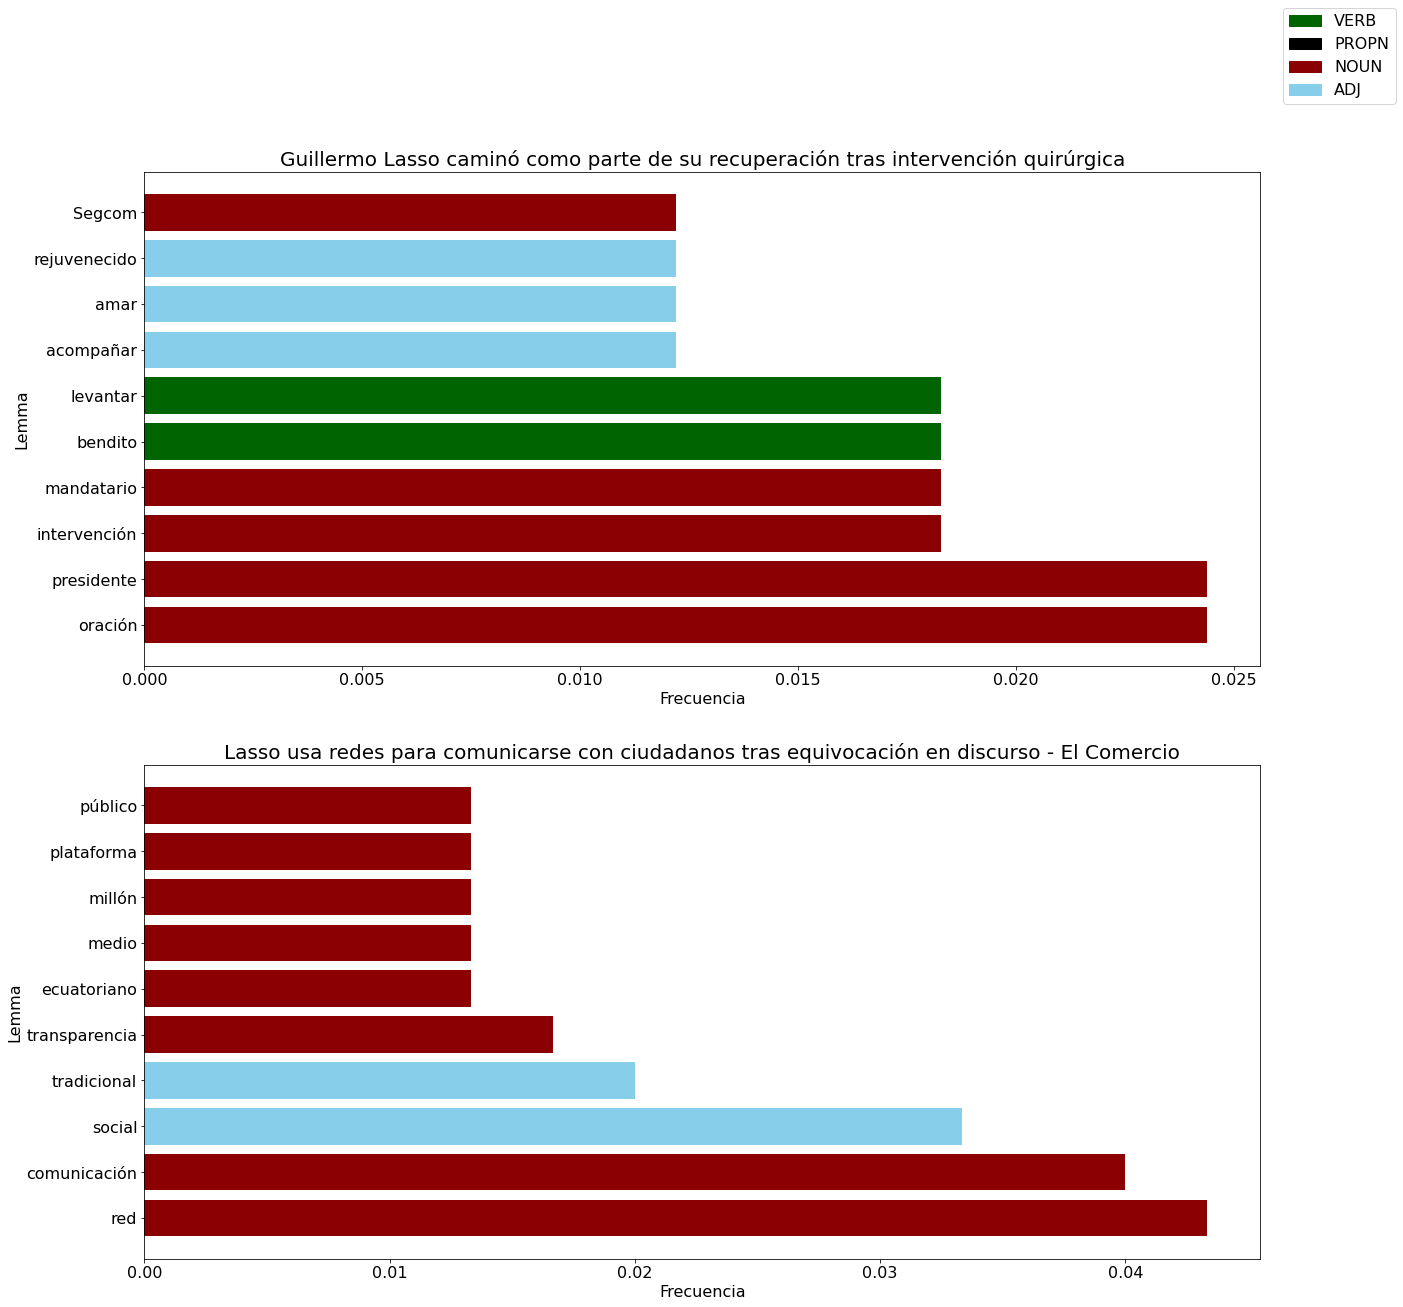

In [ ]:
# Realizamos el gráfico
count_titular_lemma['color'] = 'gray'
count_titular_lemma.loc[count_titular_lemma.pos=='VERB',"color"] = "darkgreen"
count_titular_lemma.loc[count_titular_lemma.pos=='PROPN',"color"] = "black"
count_titular_lemma.loc[count_titular_lemma.pos=='NOUN',"color"] = "darkred"
count_titular_lemma.loc[count_titular_lemma.pos=='ADJ',"color"] = "skyblue"
fig, (ax1,ax2) = plt.subplots(2, figsize=(20,20))
ax1.barh(count_titular_lemma.loc[count_titular_lemma.doc_id==titular_1,"lemma"],
         count_titular_lemma.loc[count_titular_lemma.doc_id==titular_1,"token_perc"],
         color = count_titular_lemma.loc[count_titular_lemma.doc_id==titular_1,"color"])
ax2.barh(count_titular_lemma.loc[count_titular_lemma.doc_id==titular_2,"lemma"],
         count_titular_lemma.loc[count_titular_lemma.doc_id==titular_2,"token_perc"],
        color = count_titular_lemma.loc[count_titular_lemma.doc_id==titular_2,"color"])
ax1.set_title(titular_1, fontsize=20)
ax2.set_title(titular_2, fontsize=20)
for i in [ax1, ax2]:
    i.set_ylabel('Lemma', fontsize = 16)
    i.set_xlabel('Frecuencia', fontsize = 16)
    i.tick_params(labelsize = 16)
patch_verb = mpatches.Patch(color='darkgreen', label='VERB')
patch_propn = mpatches.Patch(color='black', label='PROPN')
patch_noun = mpatches.Patch(color='darkred', label='NOUN')
patch_adj = mpatches.Patch(color='skyblue', label='ADJ')
fig.legend(handles = [patch_verb, patch_propn, patch_noun, patch_adj],
          fontsize = 16)
plt.show()

Aquí podemos observar que la frecuencia relativa de las palabras va en general, máximo hasta un poco más arriba del 2% con respecto al total de palabras.

### **1.2. Tf-idf**

La medida Tf-idf lo que hace es buscar las palabras importantes en el contenido de un documento midiendo su frecuencia general y penalizándola según más frecuente se haga entre varios documentos. Es decir, buscamos las palabras frecuentes pero no comunes.

En Python esto se logra como:

In [ ]:
# Declaramos el número de documentos
n_documentos = noticiasLasso_annotated.doc_id.nunique()
n_documentos

65

In [ ]:
# Calculamos la frecuencia relativa de cada palabra
tf = noticiasLasso_annotated.\
    groupby(['doc_id','lemma'], as_index=False).\
    agg({'token':"count"})
tf['token_perc'] = tf.token/tf.groupby('doc_id').token.transform('sum')
tf.groupby('doc_id').agg({'token_perc':'sum'}).head(3)

,token_perc
doc_id,
"14 años de debate, para focalizar subsidios; Gobierno y transportistas en diálogo - El Comercio",1.0
Alza en ciertos aranceles consulares y diplomáticos genera rechazo en migrantes ecuatorianos; exigen derogación del acuerdo ministerial,1.0
Angustia y tristeza sigue causando el COVID-19 en pacientes y sus familiares en hospitales de Guayaquil; médicos piden no tener ‘falsa confianza’ y aumentar cuidados,1.0


In [ ]:
tf.head()

,doc_id,lemma,token,token_perc
0,"14 años de debate, para focalizar subsidios; G...",Acosta,1,0.002591
1,"14 años de debate, para focalizar subsidios; G...",Agriculturar,1,0.002591
2,"14 años de debate, para focalizar subsidios; G...",Alberto,1,0.002591
3,"14 años de debate, para focalizar subsidios; G...",Análisis,1,0.002591
4,"14 años de debate, para focalizar subsidios; G...",Atención,1,0.002591


In [ ]:
# Calculamos el número de documentos en los que aparece cada palabra
df = noticiasLasso_annotated.\
    groupby(['lemma'], as_index=False).\
    agg({'doc_id':'nunique'})
df.loc[df.doc_id==10].head()

,lemma,doc_id
230,Desarrollo,10
808,abril,10
817,acceso,10
827,acompañar,10
963,analizar,10


In [ ]:
# Calculamos el idf
df['idf'] = np.log(n_documentos/df.doc_id)
df.loc[df.doc_id==10].head()

,lemma,doc_id,idf
230,Desarrollo,10,1.871802
808,abril,10,1.871802
817,acceso,10,1.871802
827,acompañar,10,1.871802
963,analizar,10,1.871802


In [ ]:
tf.head()

,doc_id,lemma,token,token_perc
0,"14 años de debate, para focalizar subsidios; G...",Acosta,1,0.002591
1,"14 años de debate, para focalizar subsidios; G...",Agriculturar,1,0.002591
2,"14 años de debate, para focalizar subsidios; G...",Alberto,1,0.002591
3,"14 años de debate, para focalizar subsidios; G...",Análisis,1,0.002591
4,"14 años de debate, para focalizar subsidios; G...",Atención,1,0.002591


In [ ]:
# Unimos los datasets y calculamos el tf-idf
tfidf = tf.merge(df.loc[:,['lemma','idf']], on=['lemma'], how='inner')
tfidf['tfidf'] = tfidf.token_perc*tfidf.idf
tfidf.head()

,doc_id,lemma,token,token_perc,idf,tfidf
0,"14 años de debate, para focalizar subsidios; G...",Acosta,1,0.002591,4.174387,0.010814
1,"14 años de debate, para focalizar subsidios; G...",Agriculturar,1,0.002591,3.481240,0.009019
2,Guillermo Lasso designó delegados ante los Con...,Agriculturar,1,0.005376,3.481240,0.018716
3,"14 años de debate, para focalizar subsidios; G...",Alberto,1,0.002591,2.382628,0.006173
4,Angustia y tristeza sigue causando el COVID-19...,Alberto,1,0.001898,2.382628,0.004521


In [ ]:
# Obtenemos los tf-idf más altos
tfidf_titular_lemma = tfidf.\
    loc[(tfidf.doc_id.isin([titular_1, titular_2]))].\
    sort_values(['doc_id','tfidf'], ascending=False).\
    groupby(['doc_id']).\
    head(10)
tfidf_titular_lemma

,doc_id,lemma,token,token_perc,idf,tfidf
3515,Lasso usa redes para comunicarse con ciudadano...,red,13,0.035519,2.788093,0.099031
7411,Lasso usa redes para comunicarse con ciudadano...,comunicación,12,0.032787,1.776492,0.058246
9522,Lasso usa redes para comunicarse con ciudadano...,tradicional,6,0.016393,3.481240,0.057070
10819,Lasso usa redes para comunicarse con ciudadano...,equivocar,4,0.010929,4.174387,0.045622
7984,Lasso usa redes para comunicarse con ciudadano...,transparencia,5,0.013661,2.788093,0.038089
3695,Lasso usa redes para comunicarse con ciudadano...,social,10,0.027322,1.341174,0.036644
623,Lasso usa redes para comunicarse con ciudadano...,cada,7,0.019126,1.871802,0.035799
10795,Lasso usa redes para comunicarse con ciudadano...,Tiktok,3,0.008197,4.174387,0.034216
10804,Lasso usa redes para comunicarse con ciudadano...,balancear,3,0.008197,4.174387,0.034216
5831,Lasso usa redes para comunicarse con ciudadano...,plataforma,4,0.010929,3.075775,0.033615


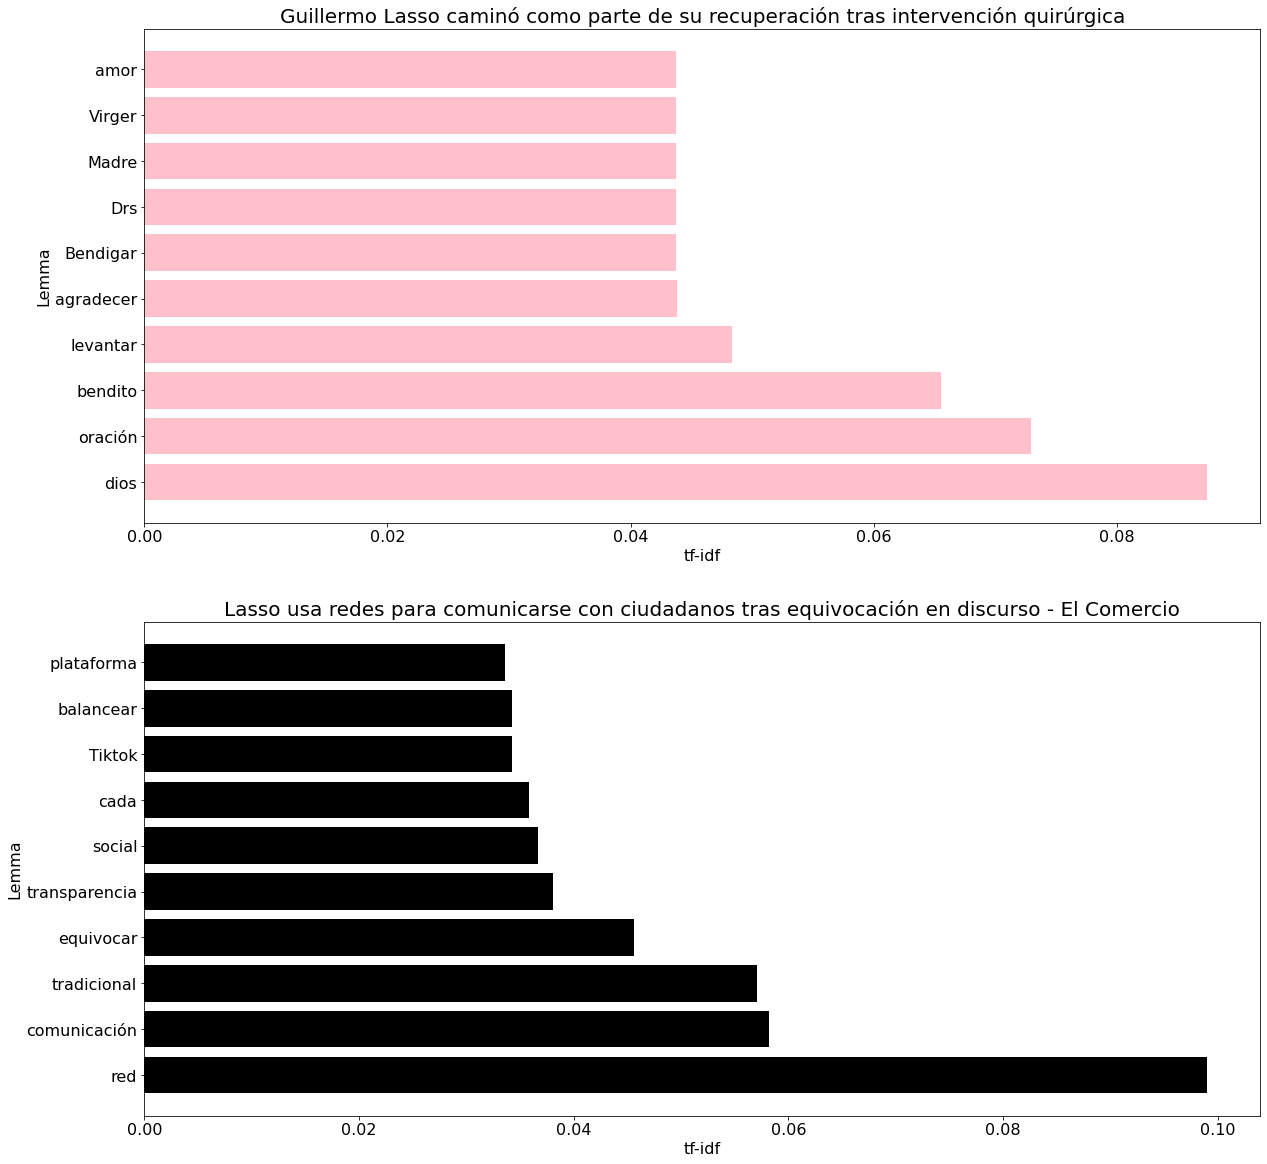

In [ ]:
# Graficamos estas palabras 'únicas'
fig, (ax1,ax2) = plt.subplots(2, figsize=(20,20))
ax1.barh(tfidf_titular_lemma.loc[tfidf_titular_lemma.doc_id==titular_1,"lemma"],
         tfidf_titular_lemma.loc[tfidf_titular_lemma.doc_id==titular_1,"tfidf"],
         color = "pink")
ax2.barh(tfidf_titular_lemma.loc[tfidf_titular_lemma.doc_id==titular_2,"lemma"],
         tfidf_titular_lemma.loc[tfidf_titular_lemma.doc_id==titular_2,"tfidf"],
        color = 'black')
ax1.set_title(titular_1, fontsize=20)
ax2.set_title(titular_2, fontsize=20)
for i in [ax1, ax2]:
    i.set_ylabel('Lemma', fontsize = 16)
    i.set_xlabel('tf-idf', fontsize = 16)
    i.tick_params(labelsize = 16)
plt.show()

## **2. Análisis exploratorio de n-gramas**

Usualmente, para ver qué tan seguido una palabra *x* es seguida de una palabra *y* podemos construir un modelo relacional entre ellas, y ese será nuestro objetivo al final de este análisis.

### **2.1. Construcción de bigramas**

Para construir los bigramas (o n-gramas de dimensión dos) recordemos el código que utilizamos en la última clase, sobre los datasets de noticias originales. Trabajaremos sobre dichos datasets en pos de ver las relaciones de las palabras incluso con artículos y preposiciones.

In [ ]:
# Función de limpieza de texto
def word_tokenize_clean(sentence, to_lower=True, remove_special_chars=True, 
                        remove_numbers=True, remove_stopwords=True):
    token_clean = word_tokenize(sentence)
    if to_lower:
        token_clean = [i.lower() for i in token_clean]
    if remove_special_chars:
        token_clean = [re.sub(r'\W+', '', i) for i in token_clean]
    if remove_numbers:
        token_clean = [re.sub(r'[0-9]+', '', i) for i in token_clean] 
    if remove_stopwords:
        token_clean = [i for i in token_clean if i.lower() not in stopwords.words('spanish')]
    token_clean = [i for i in token_clean if i!='']
    return token_clean

In [ ]:
# Cargamos el dataset completo
noticiasLasso_df = pd.read_excel('noticias_Guillermo_Lasso.xlsx', index_col=0)

In [ ]:
# Establecemos un ejemplo
ejemplo_palabra = list(noticiasLasso_df.Noticia)[0].split(".")[2]
ejemplo_palabra

'\xa0\xa0 María de Lourdes Alcívar , esposa del Jefe de Estado, informó a través de su cuenta en Twitter, la noche del 24 de junio del 2021, que el mandatario ya se levantó y caminó'

In [ ]:
# Tokenizado por bigramas
[' '.join(i) for i in ngrams(word_tokenize_clean(ejemplo_palabra), 2)]

['maría lourdes',
 'lourdes alcívar',
 'alcívar esposa',
 'esposa jefe',
 'jefe informó',
 'informó través',
 'través cuenta',
 'cuenta twitter',
 'twitter noche',
 'noche junio',
 'junio mandatario',
 'mandatario levantó',
 'levantó caminó']

In [ ]:
# Creamos una función de tokenización por documento
def tokenize_ngram_df(data, text, doc_id,  n,
                     to_lower=True, remove_special_chars=True, 
                    remove_numbers=True, remove_stopwords=True):
    df_results = []
    for i in range(0,data.shape[0]):
        text_i = list(noticiasLasso_df['Noticia'])[i]
        doc_id_i = data.loc[:,doc_id].iloc[i]
        data_i = [(doc_id_i,' '.join(list(i))) for i in ngrams(word_tokenize_clean(text_i), n)]
        df_i = pd.DataFrame(data_i, columns =['doc_id', 'ngram'])
        df_results.append(df_i)
    result = pd.concat(df_results)
    return result

In [ ]:
# Ejecutamos la función de tokenización con bigramas
noticiasLasso_bigramas = tokenize_ngram_df(noticiasLasso_df, 'Noticia', 'Titular', 2)
noticiasLasso_bigramas.head()

,doc_id,ngram
0,Guillermo Lasso caminó como parte de su recupe...,presidente guillermo
1,Guillermo Lasso caminó como parte de su recupe...,guillermo lasso
2,Guillermo Lasso caminó como parte de su recupe...,lasso continúa
3,Guillermo Lasso caminó como parte de su recupe...,continúa proceso
4,Guillermo Lasso caminó como parte de su recupe...,proceso recuperación


### **2.2. Conteo y tf-idf de bigramas**

Sobre los bigramas construidos en el literal anterior realicemos el conteo de tokens.

In [ ]:
# Bigramas más frecuentes
noticiasLasso_bigramas.\
    groupby('ngram').\
    agg({'doc_id':'count'}).\
    sort_values(['doc_id'], ascending=False).\
    head()

,doc_id
ngram,
guillermo lasso,75
presidente guillermo,36
decreto ejecutivo,30
presidente lasso,29
presidente república,28


Ahora, calculemos el tf-idf en estos datasets:

In [ ]:
# Declaramos el número de documentos
n_documentos = noticiasLasso_bigramas.doc_id.nunique()
n_documentos

65

In [ ]:
# Calculamos la frecuencia relativa de cada bigrama
noticiasLasso_bigramas['n'] = 1
tf = noticiasLasso_bigramas.\
    groupby(['doc_id','ngram'], as_index=False).\
    agg({'n':'count'})
tf['token_perc'] = tf.n/tf.groupby('doc_id').n.transform('sum')
tf.groupby('doc_id').agg({'token_perc':'sum'}).head(3)

,token_perc
doc_id,
"14 años de debate, para focalizar subsidios; Gobierno y transportistas en diálogo - El Comercio",1.0
Alza en ciertos aranceles consulares y diplomáticos genera rechazo en migrantes ecuatorianos; exigen derogación del acuerdo ministerial,1.0
Angustia y tristeza sigue causando el COVID-19 en pacientes y sus familiares en hospitales de Guayaquil; médicos piden no tener ‘falsa confianza’ y aumentar cuidados,1.0


In [ ]:
# Calculamos el número de documentos en los que aparece cada bigrama
df = noticiasLasso_bigramas.\
    groupby(['ngram'], as_index=False).\
    agg({'doc_id':'nunique'})
df.loc[df.doc_id==10].head()

,ngram,doc_id
7380,ley orgánica,10
10921,rafael correa,10
11773,secretaría general,10


In [ ]:
# Calculamos el idf
df['idf'] = np.log(n_documentos/df.doc_id)
df.loc[df.doc_id==10].head()

,ngram,doc_id,idf
7380,ley orgánica,10,1.871802
10921,rafael correa,10,1.871802
11773,secretaría general,10,1.871802


In [ ]:
# Unimos los datasets y calculamos el tf-idf
tfidf = tf.merge(df.loc[:,['ngram','idf']], on=['ngram'], how='inner')
tfidf['tfidf'] = tfidf.token_perc*tfidf.idf
tfidf.head()

,doc_id,ngram,n,token_perc,idf,tfidf
0,"14 años de debate, para focalizar subsidios; G...",acceder cupo,1,0.002604,4.174387,0.010871
1,"14 años de debate, para focalizar subsidios; G...",acompañadas atención,1,0.002604,4.174387,0.010871
2,"14 años de debate, para focalizar subsidios; G...",acordara formar,1,0.002604,4.174387,0.010871
3,"14 años de debate, para focalizar subsidios; G...",acosta burneo,1,0.002604,4.174387,0.010871
4,"14 años de debate, para focalizar subsidios; G...",actores deben,1,0.002604,4.174387,0.010871


In [ ]:
# Obtenemos los tf-idf más altos
tfidf_titular_bigrama = tfidf.\
    loc[(tfidf.doc_id.isin([titular_1, titular_2]))].\
    sort_values(['doc_id','tfidf'], ascending=False).\
    groupby(['doc_id']).\
    head(10)
tfidf_titular_bigrama

,doc_id,ngram,n,token_perc,idf,tfidf
915,Lasso usa redes para comunicarse con ciudadano...,redes sociales,10,0.027548,3.075775,0.084732
11992,Lasso usa redes para comunicarse con ciudadano...,cada diez,3,0.008264,4.174387,0.034499
12017,Lasso usa redes para comunicarse con ciudadano...,comunicación tradicional,3,0.008264,4.174387,0.034499
12156,Lasso usa redes para comunicarse con ciudadano...,once cada,3,0.008264,4.174387,0.034499
11974,Lasso usa redes para comunicarse con ciudadano...,alguna vez,2,0.005510,4.174387,0.022999
11987,Lasso usa redes para comunicarse con ciudadano...,balancear comunicación,2,0.005510,4.174387,0.022999
11993,Lasso usa redes para comunicarse con ciudadano...,cada ecuatorianos,2,0.005510,4.174387,0.022999
12018,Lasso usa redes para comunicarse con ciudadano...,comunicación tradicionales,2,0.005510,4.174387,0.022999
12047,Lasso usa redes para comunicarse con ciudadano...,diez ecuatorianos,2,0.005510,4.174387,0.022999
12069,Lasso usa redes para comunicarse con ciudadano...,ecuatorianos equivocado,2,0.005510,4.174387,0.022999


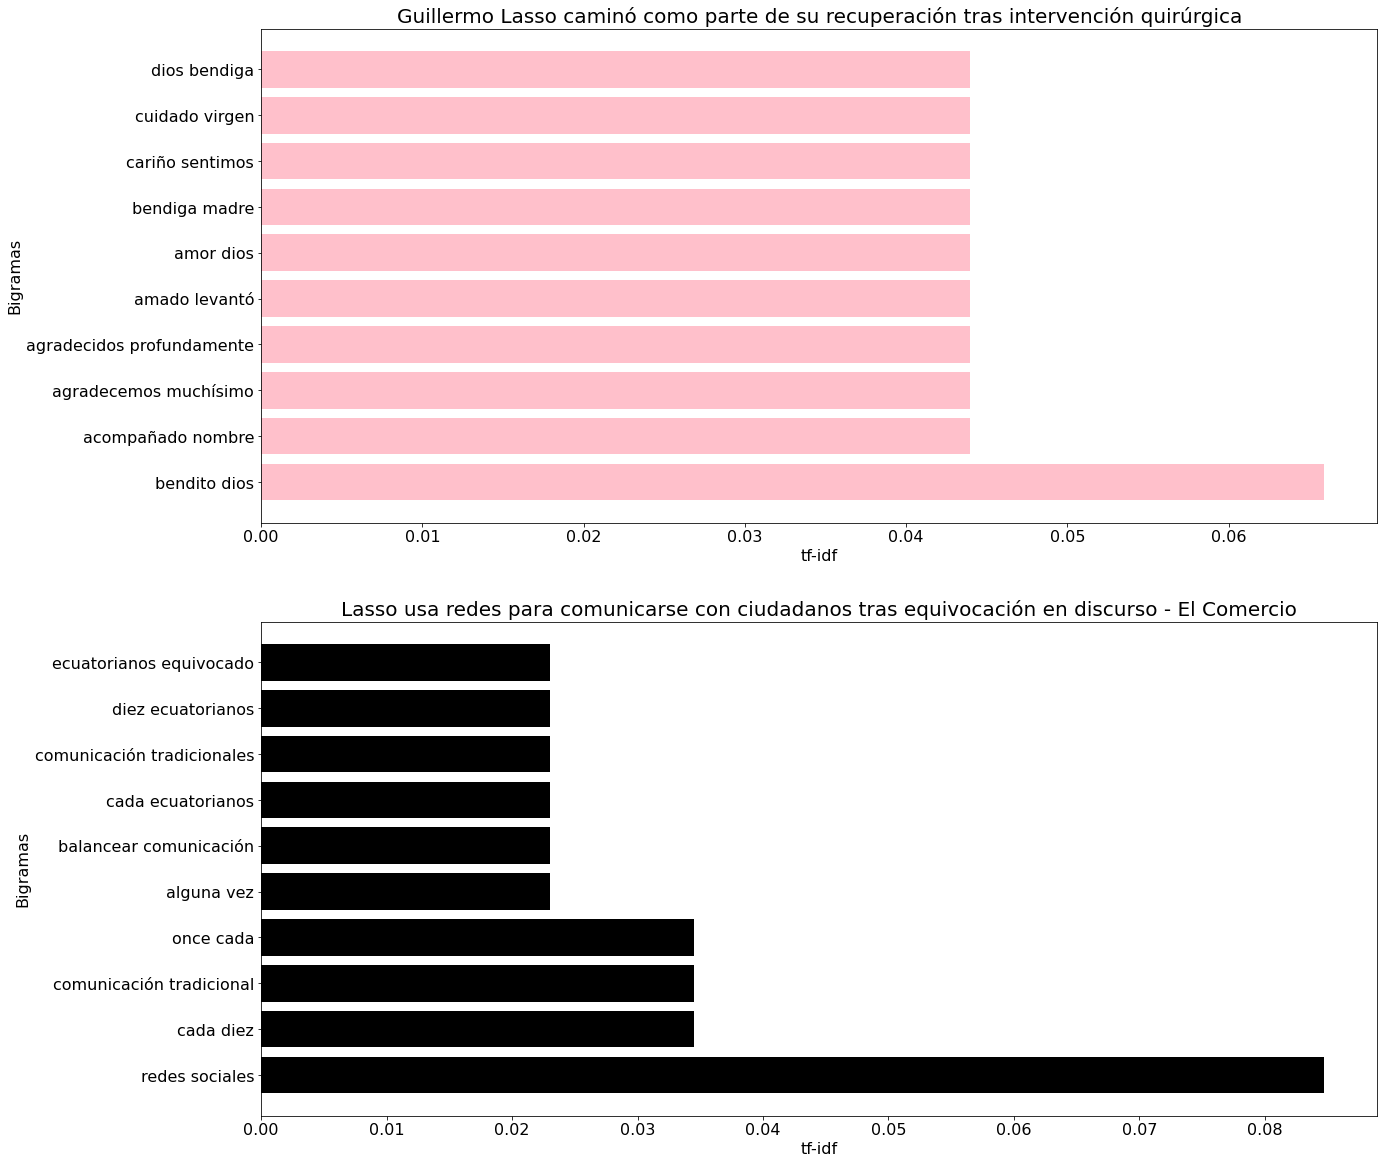

In [ ]:
# Graficamos estas palabras 'únicas'
fig, (ax1,ax2) = plt.subplots(2, figsize=(20,20))
ax1.barh(tfidf_titular_bigrama.loc[tfidf_titular_bigrama.doc_id==titular_1,"ngram"],
         tfidf_titular_bigrama.loc[tfidf_titular_bigrama.doc_id==titular_1,"tfidf"],
         color = "pink")
ax2.barh(tfidf_titular_bigrama.loc[tfidf_titular_bigrama.doc_id==titular_2,"ngram"],
         tfidf_titular_bigrama.loc[tfidf_titular_bigrama.doc_id==titular_2,"tfidf"],
        color = 'black')
ax1.set_title(titular_1, fontsize=20)
ax2.set_title(titular_2, fontsize=20)
for i in [ax1, ax2]:
    i.set_ylabel('Bigramas', fontsize = 16)
    i.set_xlabel('tf-idf', fontsize = 16)
    i.tick_params(labelsize = 16)
plt.show()

## **3. Nubes de palabras**

Para realizar nubes de palabras, que coloquen el tamaño de las palabras acorde a su frecuencia, utilizaremos la librería *wordcloud*.

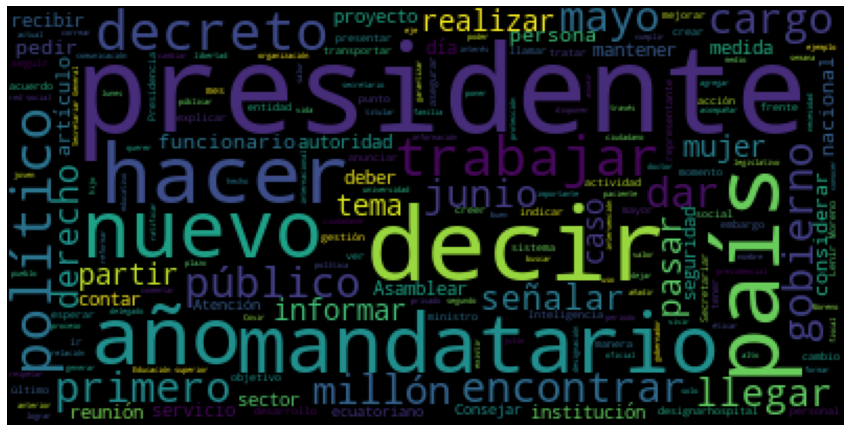

In [ ]:
wc = WordCloud().generate(' '.join(noticiasLasso_annotated.loc[noticiasLasso_annotated.pos.isin(['VERB','PNOUN','NOUN','ADJ']),'lemma']))
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

## **4. Extracción de palabras clave**

El generar conclusiones e insight de un texto con miles de líneas y palabras puede ser abordado desde varias perspectivas. Una de ellas es la extracción de palabras claves, que puede ser conseguida a través de algoritmos de NLP. Esta será entonces nuestra última misión en este capítulo.

Acorde a Thushara et al. (2019), algunos de los algoritmos de extracción de palabras clave son:

+ RAKE (Rapid Automatic Keyword Extraction): Es un algoritmo no supervisado que obtiene palabras clave a través del análisis de la frecuencia y grado (co-ocurrencia) de las palabras.
+ TextRank: Es una técnica no supervisada basada en grafos que obtiene el resumen de un texto. Está basada sobretodo en etiquetado POS.
+ PositionRank: Es un algoritmo basado en grafos que busca frases al inicio de los documentos y los candidatiza a ser clave.

### **4.1. RAKE**

La librería *nltk* consta de una extensión con el algoritmo RAKE para extracción de palabras clave. Este es un algoritmo no supervisado que obtiene palabras clave a través del análisis de la frecuencia y grado (co-ocurrencia) de las palabras. Específicamiente, sigue estos pasos:

+ Se extraen las palabras candidatas del conjunto de palabras, después de haber quitado palabras vacías e irrelevantes.
+ Se calcula un score para cada palabra a través de:
    + Se busca cuántas veces ocurre una palabra y cuántas veces co-ocurre con otra.
    + Se construye el score como el ratio de co-ocurrencias versus frecuencia.
+ Se ordena el score de mayor a menor y las primeras serán las palabras clave.
A continuación veremos ejemplos de la aplicación de esta técnica.

In [ ]:
help(Rake)

Help on class Rake in module rake_nltk.rake:

class Rake(builtins.object)
 |  Rake(stopwords=None, punctuations=None, language='english', ranking_metric=<Metric.DEGREE_TO_FREQUENCY_RATIO: 0>, max_length=100000, min_length=1)
 |  
 |  Rapid Automatic Keyword Extraction Algorithm.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, stopwords=None, punctuations=None, language='english', ranking_metric=<Metric.DEGREE_TO_FREQUENCY_RATIO: 0>, max_length=100000, min_length=1)
 |      Constructor.
 |      
 |      :param stopwords: List of Words to be ignored for keyword extraction.
 |      :param punctuations: Punctuations to be ignored for keyword extraction.
 |      :param language: Language to be used for stopwords
 |      :param max_length: Maximum limit on the number of words in a phrase
 |                         (Inclusive. Defaults to 100000)
 |      :param min_length: Minimum limit on the number of words in a phrase
 |                         (Inclusive. Defaults to 1)
 |  
 |  ex

In [ ]:
# Inicializamos Rake en nltk
rake_nltk = Rake(language='spanish', max_length=3, stopwords = stopwords.words('spanish'))
type(rake_nltk)

rake_nltk.rake.Rake

In [ ]:
# Extraemos las palabras clave para un ejemplo
rake_nltk.extract_keywords_from_text(list(noticiasLasso_df.Noticia)[0])
keyword_extracted = rake_nltk.get_ranked_phrases()
keyword_extracted[0:3]

['hospital jackson memorial',
 'bendiga madre santisima',
 'presidente logre mejorar']

In [ ]:
# Creamos una función que extraiga la idea principal de cada documento
def rake_lista_documentos(data, text):
    rake_nltk = Rake(language='spanish', max_length=3, stopwords = stopwords.words('spanish'))
    keywords = []
    for i in range(0,data.shape[0]):
        rake_nltk.extract_keywords_from_text(list(data[text])[i])
        keyword_extracted = rake_nltk.get_ranked_phrases()
        keywords.append(keyword_extracted[0])
    data['keywords'] = keywords
    return data

In [ ]:
noticiasLasso_df_kw = rake_lista_documentos(noticiasLasso_df, 'Noticia')

In [ ]:
for i in range(0,3):
    print('Titular de la noticia: '+noticiasLasso_df_kw.loc[:,'Titular'].iloc[i])
    print('Palabras clave: '+noticiasLasso_df_kw.loc[:,'keywords'].iloc[i])

Titular de la noticia: Guillermo Lasso caminó como parte de su recuperación tras intervención quirúrgica
Palabras clave: hospital jackson memorial
Titular de la noticia: Mientras se recupera de la operación, Guillermo Lasso recibió la llamada del senador estadounidense Christopher Dodd
Palabras clave: vicepresidente alfredo borrero
Titular de la noticia: Dos normas vigentes se contraponen al decreto de Guillermo Lasso sobre el uso personal del avión presidencial
Palabras clave: teniente clara avilés


## **5. Tarea: Análisis exploratorio de datos de texto**

En base a las técnicas de preprocesamiento y análisis de datos de texto revisadas en clase, definir un objetivo de análisis para un caso de estudio de selección personal. Sobre este objetivo realizar cada paso de los enlistados a continuación:

- Definir un objetivo de análisis.
- Obtener un dataset de análisis apropiado.
- Realizar el procesamiento de datos necesario incluyendo pero no limitándose a la tokenización, lematización, eliminación de palabras vacías, etc. Nótese que el proceso a seguir dependerá del objetivo del estudio.
- Elaborar las gráficas necesarias para analizar los datos.
- Realizar conclusiones acerca del análisis.

El trabajo podrá ser entregado como un *notebook* o como un script *.py*. El estudiante tendrá 15 días para presentarlo a partir de la finalización del capítulo 4, y lo deberá enviar al correo del instructor.

## **6. Bibliografía**

Thushara, M. G., Mownika, T. & Mangamuru, R. (2019), «A comparative study on different keyword extraction algorithms», Proceedings of the 3rd International Conference on Computing Methodologies and Communication, ICCMC 2019, No. March.